# Covariate analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

from lib import plot, u

A small function to help format the x axis. The default seaborn limits can be incorrect with some variables.

In [3]:
PANELSIZE = (7, 4.5)

In [4]:
EXTPANELSIZE = (7, 6)

In [5]:
MITODENSITYMARGIN = 0.001
def adjustxlim(x=None, margin=MITODENSITYMARGIN):
    x = covdf["somamitodensity"] if x is None else x
    plt.xlim(x.min()- margin, x.max() + margin)

In [6]:
covdf = pd.read_csv("data/mito_covariates.csv", index_col=0)

In [7]:
covdf.head()

,basalmitocoverage,basalpathlength,basalsyncount,basalsyndensity,cellid,basalmitocovfactor,basal %pl within 20um,somavol,nucvol,somamitovol,somamitodensity,somaticmitocount,somasyndensity,depth,apicalmitocoverage,apicalpathlength,apicalsyncount,apicalsyndensity,apicalmitocovfactor,apical %pl within 20um
0,0.797220,1135.767461,1987,1.749478,648518346349539076,0.913667,0.532621,1397.574125,552.057116,73.618911,0.087070,209,0.095585,230328.257398,0.781562,436.910114,870.0,1.991256,0.984025,0.214843
1,0.784184,1670.966250,3122,1.868380,648518346349538053,0.851435,0.374298,1168.690198,489.896633,72.334162,0.106563,266,0.105546,206077.104367,0.762532,565.514823,1018.0,1.800130,0.841754,0.207247
2,0.750715,991.071646,1643,1.657801,648518346349539591,0.879747,0.628978,1406.871081,519.001845,94.052091,0.105930,305,0.110872,244008.897477,0.823897,832.012657,1428.0,1.716320,0.907548,0.197432
3,0.827072,1839.622475,3897,2.118369,648518346349538440,0.923517,0.309913,1475.944871,568.471295,84.315761,0.092913,388,0.126731,205619.742385,0.794688,640.409467,1379.0,2.153310,0.964497,0.332521
4,0.713487,1886.992268,3161,1.675153,648518346349539593,0.777246,0.450823,1053.064184,461.694352,63.940285,0.108122,239,0.094933,218137.586497,0.791422,446.927376,757.0,1.693787,0.926741,0.251376


In [8]:
len(covdf)

65

Local apical arbors with <100$\mu$m path length don't have obliques or many synapses

In [9]:
apicaldf = covdf[covdf.apicalpathlength > 100]

In [10]:
apicaldf.shape

(59, 20)

# Scatter Plots

### Somatic vs basal coverage factor

/usr/people/nturner/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.20365623498792837 0.10370030480130146


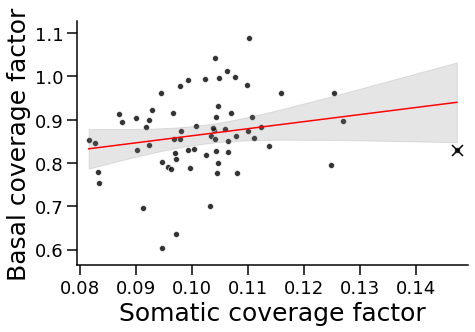

In [11]:
fig = plt.figure(figsize=PANELSIZE)
r, p, fit = plot.panelE(covdf)
adjustxlim(margin=0.002)
print(r, p)

Taking note of the outlier id

In [12]:
outlierid = covdf.cellid[covdf.somamitodensity  == covdf.somamitodensity.max()].item()
outlierid

648518346349534079

### Basal coverage factor vs. synapse density

0.6215389725800315 3.291604336595351e-08


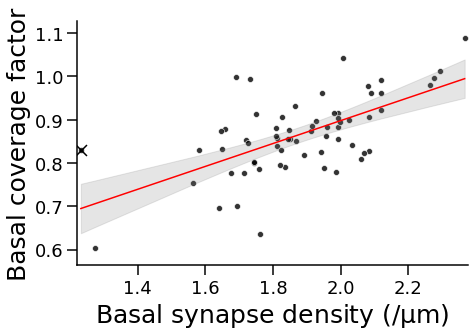

In [13]:
fig = plt.figure(figsize=PANELSIZE)
r, p, fit = plot.panelF(covdf)
adjustxlim(covdf["basalsyndensity"], 0.01)
print(r, p)

### Somatic mito density vs. Soma synapse density

0.34150717165816125 0.005367142446122613


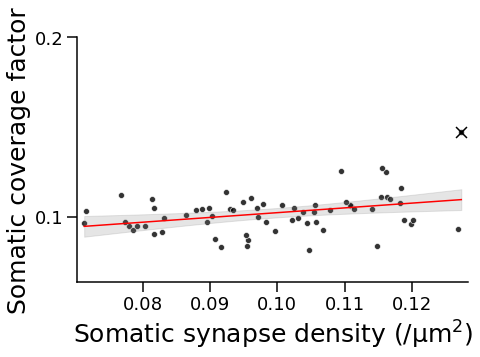

In [14]:
fig = plt.figure(figsize=PANELSIZE)
r, p, fit = plot.panelG(covdf)
adjustxlim(covdf["somasyndensity"])
plt.yticks([0.1, 0.2])
plt.ylabel("Somatic coverage factor")  # cheating to get the proportions right (correct this later in inkscape)
print(r, p)

### Basal synapse density vs. Somatic synapse density

0.16545596036277552 0.18778336798102663


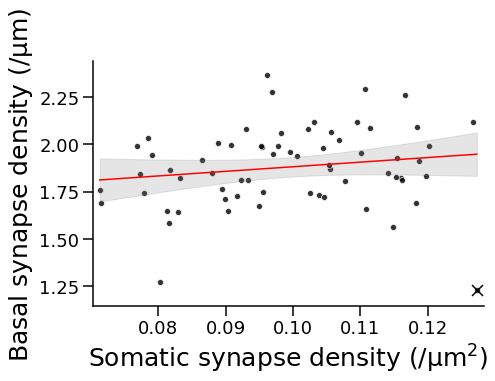

In [15]:
fig = plt.figure(figsize=PANELSIZE)
r, p, fit = plot.extPanel4D(covdf)
adjustxlim(covdf["somasyndensity"])
print(r, p)

# Same plots w/o outlier

0.26807914406543076 0.032214791472383084


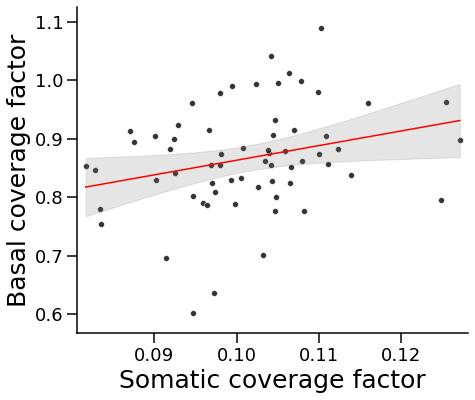

In [16]:
fig = plt.figure(figsize=EXTPANELSIZE)
r, p, fit = plot.extPanel5C(covdf)
adjustxlim(covdf.somamitodensity[covdf.cellid != plot.OUTLIERID])
print(r, p)

0.6540869573623275 4.602394398984425e-09


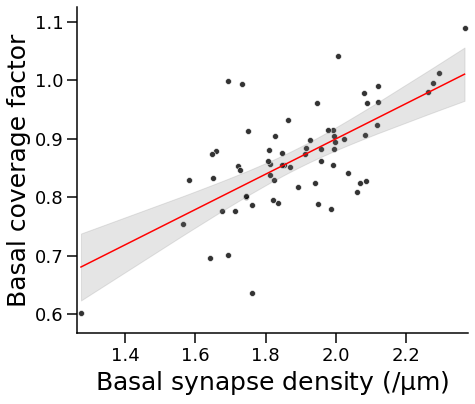

In [17]:
fig = plt.figure(figsize=EXTPANELSIZE)
r, p, fit = plot.extPanel5D(covdf)
adjustxlim(covdf.basalsyndensity[covdf.cellid != plot.OUTLIERID], 0.01)
print(r, p)

0.25753179235766577 0.03993294261697857


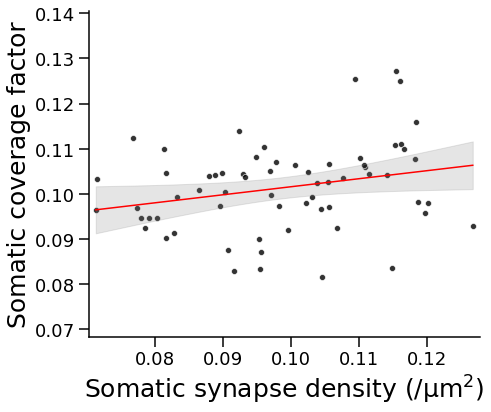

In [18]:
fig = plt.figure(figsize=EXTPANELSIZE)
r, p, fit = plot.extPanel5E(covdf)
adjustxlim(covdf.somasyndensity[covdf.cellid != plot.OUTLIERID])
print(r, p)

0.25753179235766577 0.03993294261697857


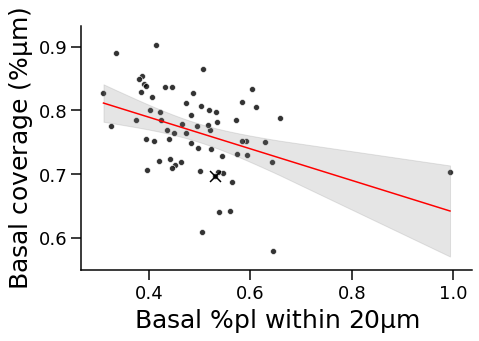

In [19]:
fig = plt.figure(figsize=PANELSIZE)
plot.plot_scatter_w_outlier(
    covdf, "basal %pl within 20um", "basalmitocoverage", outlierids=[plot.OUTLIERID])
print(r, p)

## Local apical arbor

0.19686375761498992 0.13505730992238504


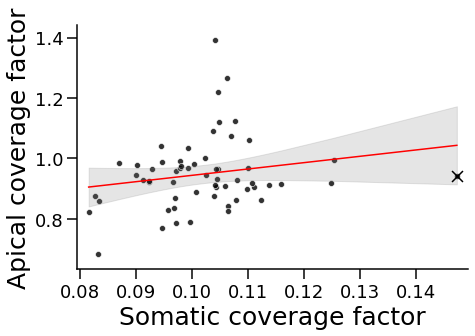

In [20]:
fig = plt.figure(figsize=PANELSIZE)
r, p, fit = plot.panelE(apicaldf, ycol="apicalmitocovfactor")
adjustxlim(margin=0.002)
print(r, p)

### Apical index vs. synapse density

0.4109551917783117 0.0012241402026729425


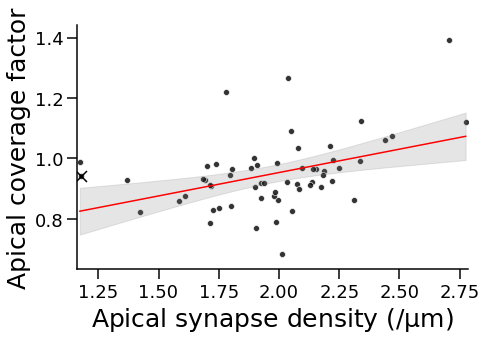

In [21]:
fig = plt.figure(figsize=PANELSIZE)
r, p, fit = plot.panelF(apicaldf, 
                        xcol="apicalsyndensity", ycol="apicalmitocovfactor")
adjustxlim(apicaldf["apicalsyndensity"], 0.01)
print(r, p)

### Apical synapse density vs. Somatic synapse density

0.03759955292182021 0.7773851533080752


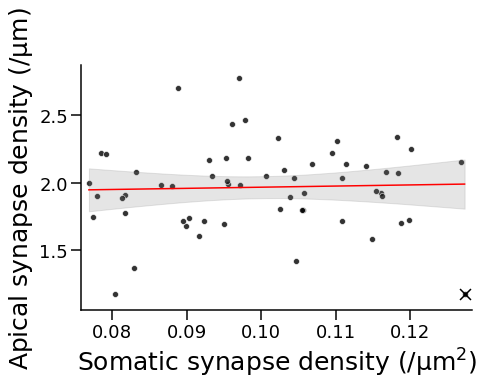

In [22]:
fig = plt.figure(figsize=PANELSIZE)

r, p, fit = plot.extPanel4D(apicaldf, ycol="apicalsyndensity")
adjustxlim(apicaldf["somasyndensity"])
print(r, p)

# Same plots w/o outlier

0.23981585214281212 0.06980330294566152


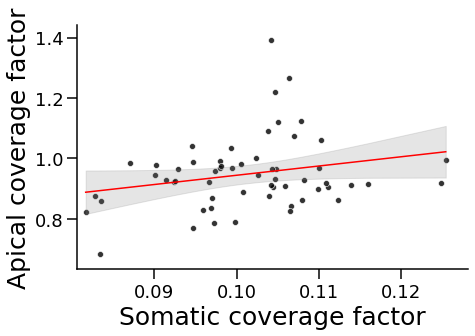

In [23]:
fig = plt.figure(figsize=PANELSIZE)
r, p, fit = plot.extPanel5C(apicaldf, ycol="apicalmitocovfactor")
adjustxlim(covdf.somamitodensity[covdf.cellid != plot.OUTLIERID])
print(r, p)

0.43410809573023745 0.0006626500950883495


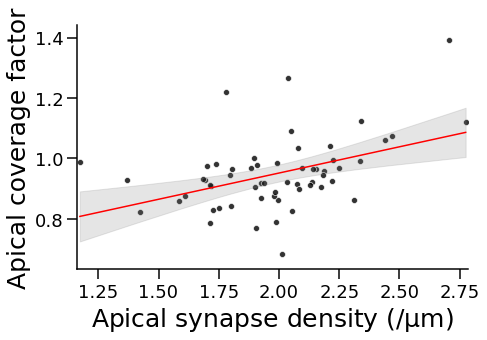

In [24]:
fig = plt.figure(figsize=PANELSIZE)
r, p, fit = plot.extPanel5D(apicaldf, xcol="apicalsyndensity", ycol="apicalmitocovfactor")
adjustxlim(apicaldf.apicalsyndensity[apicaldf.cellid != plot.OUTLIERID], 0.01)
print(r, p)

0.2178476596084129 0.10043296098704839


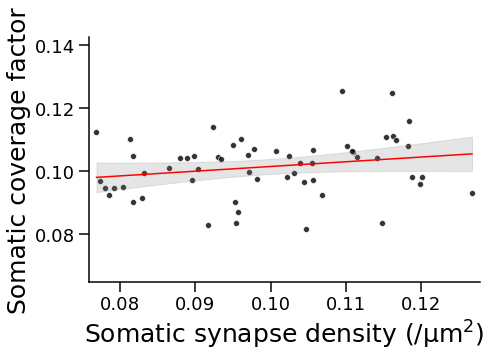

In [25]:
fig = plt.figure(figsize=PANELSIZE)
r, p, fit = plot.extPanel5E(apicaldf)
adjustxlim(apicaldf.somasyndensity[apicaldf.cellid != plot.OUTLIERID])
print(r, p)

-0.6843628808512086 2.286061212179477e-09


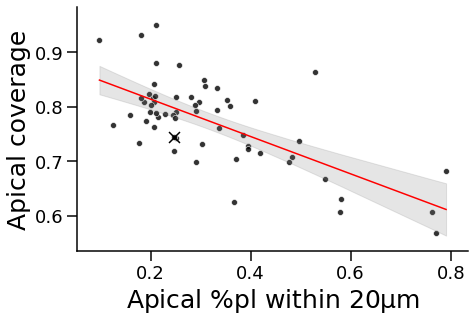

In [26]:
fig = plt.figure(figsize=PANELSIZE)
r, p, fit = plot.plot_scatter_w_outlier(
    apicaldf, "apical %pl within 20um", "apicalmitocoverage", outlierids=[plot.OUTLIERID])
print(r, p)

0.26038610936673506 0.0361842281960412


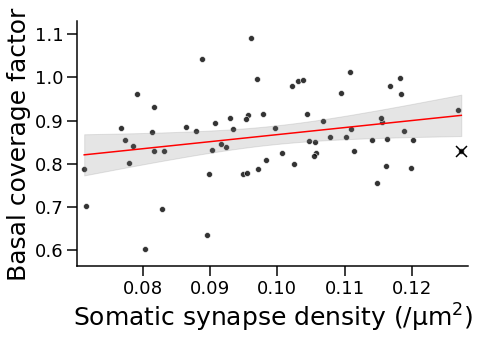

In [27]:
fig = plt.figure(figsize=PANELSIZE)
r, p, fit = plot.plot_scatter_w_outlier(
    covdf, "somasyndensity", "basalmitocovfactor", outlierids=[plot.OUTLIERID])
adjustxlim(covdf["somasyndensity"])
print(r, p)